## Telecom X - Análisis de Evasión de Clientes
Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto **Churn de Clientes**. La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

#📌 Extracción

In [1]:
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
import pandas as pd

# URL de la API de datos
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

# Cargar los datos desde la URL directamente en un DataFrame
df = pd.read_json(url)

# Mostrar una vista previa de los datos
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
# Información general de la base
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [4]:
# Dimensiones generales
print(f"\nDimensiones del DataFrame: {df.shape[0]} filas y {df.shape[1]} columnas")


Dimensiones del DataFrame: 7267 filas y 6 columnas


In [5]:
# Normalizando los datos
cliente=pd.json_normalize(df['customer'])
phone=pd.json_normalize(df['phone'])
internet=pd.json_normalize(df['internet'])
cuenta=pd.json_normalize(df['account'])
datos_iniciales=pd.concat([df['customerID'],df['Churn']],axis=1)

#🔧 Transformación

Ahora que ya hemos extraído los datos, es fundamental comprender la estructura del dataset y el significado de las columnas. Esta etapa ayudará a identificar qué variables son más relevantes para el análisis de evasión de clientes y como poder ordenadarlas de mejor manera para hacer de los datos mucho mas claros.

In [6]:
print("Tipos de datos:")
print(df.dtypes)

Tipos de datos:
customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object


In [7]:
print("\nColumnas del dataset:")
print(df.columns.tolist())


Columnas del dataset:
['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']


In [8]:
# Dimensionando la data
print(f"\nEl dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.")


El dataset tiene 7267 filas y 6 columnas.


 ## Información general sobre las principales variables

 Dado el diccionario que me comparten, cada columna representa información especifica del cliente, como género, edad, tipo de servicios contratados, método de pago y si ha dejado o no la empresa (Churn).
Tenemos algunas columnas binarias ("Yes"/"No"), algunas otras categóricas, y por ultimo algunas numéricas.

Se logra identificar 7 variables principales que pueden influir en la evasión.

In [9]:
# Crear una copia del DataFrame principal
df_temp = datos_iniciales.copy()

# Convertir la columna 'Churn' de valores categóricos a numéricos
df_temp['Churn'] = df_temp['Churn'].map({'Yes': 1, 'No': 0})

# Calcular la correlación de las variables numéricas con 'Churn'
correlaciones = df_temp.corr(numeric_only=True)['Churn'].sort_values(ascending=False)

print("\nCorrelación de las variables numéricas con 'Churn':")
print(correlaciones)


Correlación de las variables numéricas con 'Churn':
Churn    1.0
Name: Churn, dtype: float64


#### Transformando *Clientes*

In [10]:
cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7267 non-null   object
 1   SeniorCitizen  7267 non-null   int64 
 2   Partner        7267 non-null   object
 3   Dependents     7267 non-null   object
 4   tenure         7267 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 284.0+ KB


In [11]:
cliente.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [12]:
for col in ['gender', 'Partner', 'Dependents']:
    print(f"\nValores únicos en '{col}':")
    print(cliente[col].value_counts(dropna=False))


Valores únicos en 'gender':
gender
Male      3675
Female    3592
Name: count, dtype: int64

Valores únicos en 'Partner':
Partner
No     3749
Yes    3518
Name: count, dtype: int64

Valores únicos en 'Dependents':
Dependents
No     5086
Yes    2181
Name: count, dtype: int64


In [13]:
# Limpieza de espacios y normalización
cliente['Partner'] = cliente['Partner'].str.strip().str.capitalize()
cliente['Dependents'] = cliente['Dependents'].str.strip().str.capitalize()
cliente['gender'] = cliente['gender'].str.strip().str.capitalize()

In [14]:
# Mapear Yes/No a 1/0 para análisis
cliente['Partner'] = cliente['Partner'].map({'Yes': 1, 'No': 0})
cliente['Dependents'] = cliente['Dependents'].map({'Yes': 1, 'No': 0})

In [15]:
cliente.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,1,1,9
1,Male,0,0,0,9
2,Male,0,0,0,4
3,Male,1,1,0,13
4,Female,1,1,0,3


#### Transformando *teléfono*

In [16]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PhoneService   7267 non-null   object
 1   MultipleLines  7267 non-null   object
dtypes: object(2)
memory usage: 113.7+ KB


In [17]:
phone.head()

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


In [18]:
for col in phone.columns:
    print(f"\nValores únicos en '{col}':")
    print(phone[col].value_counts(dropna=False))


Valores únicos en 'PhoneService':
PhoneService
Yes    6560
No      707
Name: count, dtype: int64

Valores únicos en 'MultipleLines':
MultipleLines
No                  3495
Yes                 3065
No phone service     707
Name: count, dtype: int64


In [19]:
# Eliminación de espacios y normalización de mayúsculas
phone = phone.applymap(lambda x: x.strip().capitalize() if isinstance(x, str) else x)

<ipython-input-19-1401352890>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  phone = phone.applymap(lambda x: x.strip().capitalize() if isinstance(x, str) else x)


In [20]:
for col in phone.columns:
    if phone[col].dtype == 'object':
        phone[col] = phone[col].str.strip().str.capitalize()

In [21]:
phone['PhoneService'] = phone['PhoneService'].map({'Yes': 1, 'No': 0})
phone['MultipleLines'] = phone['MultipleLines'].map({
    'Yes': 1,
    'No': 0,
    'No phone service': 0  # Lo tratamos como 'No'
})

In [22]:
phone.head()

,PhoneService,MultipleLines
0,1,0
1,1,1
2,1,0
3,1,0
4,1,0


Transformando *Internet*

In [23]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   InternetService   7267 non-null   object
 1   OnlineSecurity    7267 non-null   object
 2   OnlineBackup      7267 non-null   object
 3   DeviceProtection  7267 non-null   object
 4   TechSupport       7267 non-null   object
 5   StreamingTV       7267 non-null   object
 6   StreamingMovies   7267 non-null   object
dtypes: object(7)
memory usage: 397.5+ KB


In [24]:
internet.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


In [25]:
# Conociendo los datos unicos de cada columna

cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

unique_values = {col: internet[col].unique() for col in cols}

# Mostrar resultados
for col, uniques in unique_values.items():
    print(f"{col}: {uniques}")

OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']


In [26]:
columnas = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
internet[columnas] = internet[columnas].apply(lambda x: x.map({'Yes': 1, 'No': 0, 'No internet service': 0}))

In [27]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   InternetService   7267 non-null   object
 1   OnlineSecurity    7267 non-null   int64 
 2   OnlineBackup      7267 non-null   int64 
 3   DeviceProtection  7267 non-null   int64 
 4   TechSupport       7267 non-null   int64 
 5   StreamingTV       7267 non-null   int64 
 6   StreamingMovies   7267 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 397.5+ KB


In [28]:
internet.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,0,1,0,1,1,0
1,DSL,0,0,0,0,0,1
2,Fiber optic,0,0,1,0,0,0
3,Fiber optic,0,1,1,0,1,1
4,Fiber optic,0,0,0,1,1,0


Transformando *Cuenta*

In [29]:
cuenta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contract          7267 non-null   object 
 1   PaperlessBilling  7267 non-null   object 
 2   PaymentMethod     7267 non-null   object 
 3   Charges.Monthly   7267 non-null   float64
 4   Charges.Total     7267 non-null   object 
dtypes: float64(1), object(4)
memory usage: 284.0+ KB


In [30]:
cuenta.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


In [31]:
cantidad_vacios = (cuenta['Charges.Total'].str.strip() == '').sum()
cantidad_vacios

np.int64(11)

In [32]:
cantidad_nan = cuenta['Charges.Total'].isna().sum()
cantidad_nan

np.int64(0)

In [33]:
cuenta['Charges.Total'] = pd.to_numeric(
    cuenta['Charges.Total'].str.replace(r'[$,]', '', regex=True),
    errors='coerce'
).fillna(0)

In [34]:
cuenta['Charges.Total']

,Charges.Total
0,593.30
1,542.40
2,280.85
3,1237.85
4,267.40
...,...
7262,742.90
7263,1873.70
7264,92.75
7265,4627.65


In [35]:
cuenta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contract          7267 non-null   object 
 1   PaperlessBilling  7267 non-null   object 
 2   PaymentMethod     7267 non-null   object 
 3   Charges.Monthly   7267 non-null   float64
 4   Charges.Total     7267 non-null   float64
dtypes: float64(2), object(3)
memory usage: 284.0+ KB


In [36]:
pd.unique(cuenta['Contract'])

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [37]:
pd.unique(cuenta['PaperlessBilling'])

array(['Yes', 'No'], dtype=object)

In [38]:
cuenta['PaperlessBilling'] = pd.to_numeric(
    cuenta['PaperlessBilling'].replace({'Yes': 1, 'No': 0}),
    errors='coerce'
).fillna(0).astype(int)

<ipython-input-38-1540158715>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cuenta['PaperlessBilling'].replace({'Yes': 1, 'No': 0}),


In [39]:
pd.unique(cuenta['PaymentMethod'])

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [40]:
cuenta['Cuentas_Diarias'] = cuenta['Charges.Monthly'] / 30.44
cuenta['Cuentas_Diarias'] = cuenta['Cuentas_Diarias'].round(2)
cuenta

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,One year,1,Mailed check,65.60,593.30,2.16
1,Month-to-month,0,Mailed check,59.90,542.40,1.97
2,Month-to-month,1,Electronic check,73.90,280.85,2.43
3,Month-to-month,1,Electronic check,98.00,1237.85,3.22
4,Month-to-month,1,Mailed check,83.90,267.40,2.76
...,...,...,...,...,...,...
7262,One year,0,Mailed check,55.15,742.90,1.81
7263,Month-to-month,1,Electronic check,85.10,1873.70,2.80
7264,Month-to-month,1,Mailed check,50.30,92.75,1.65
7265,Two year,0,Mailed check,67.85,4627.65,2.23


## Transformación datos iniciales

In [41]:
datos_iniciales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
dtypes: object(2)
memory usage: 113.7+ KB


In [42]:
datos_iniciales.head()

,customerID,Churn
0,0002-ORFBO,No
1,0003-MKNFE,No
2,0004-TLHLJ,Yes
3,0011-IGKFF,Yes
4,0013-EXCHZ,Yes


In [43]:
cantidad_vacios = datos_iniciales['Churn'].str.strip().eq('').sum()
cantidad_vacios

np.int64(224)

In [44]:
pd.unique(datos_iniciales['Churn'])

array(['No', 'Yes', ''], dtype=object)

In [45]:
datos_iniciales['Churn'] = pd.to_numeric(
    datos_iniciales['Churn'].replace({'Yes': 1, 'No': 0}),
    errors='coerce'
).fillna(0).astype(int)

In [46]:
datos_iniciales

,customerID,Churn
0,0002-ORFBO,0
1,0003-MKNFE,0
2,0004-TLHLJ,1
3,0011-IGKFF,1
4,0013-EXCHZ,1
...,...,...
7262,9987-LUTYD,0
7263,9992-RRAMN,1
7264,9992-UJOEL,0
7265,9993-LHIEB,0


#📊 Carga y análisis

In [47]:
df_final_kev = pd.concat([datos_iniciales,cliente,phone,internet,cuenta], axis=1)

In [48]:
df_final_kev.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2277.182035,2.126155
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2268.648587,0.989744
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.600000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,396.200000,1.160000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1389.200000,2.310000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3778.525000,2.950000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.900000


In [49]:
df_final_kev

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.16
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1.97
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.43
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.22
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.81
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.80
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.65
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.23


In [50]:
df_final_kev.to_csv('df_final_kev.csv', index=False)

In [51]:
churn_counts = df_final_kev['Churn'].value_counts()

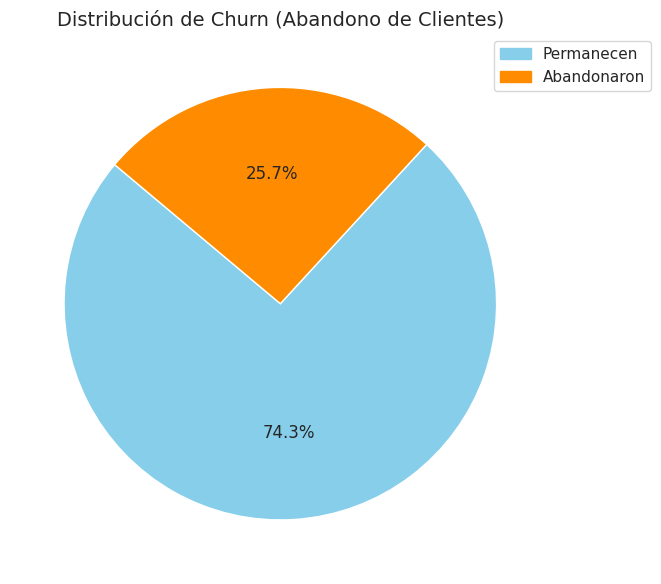

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# Estilo
sns.set(style="whitegrid")

# Datos
labels = churn_counts.index.tolist()
sizes = churn_counts.values
percentages = churn_counts / churn_counts.sum() * 100
colors = ["skyblue", "darkorange"]
labels_custom = ['Permanecen', 'Abandonaron']

# Crear figura
fig, ax = plt.subplots(figsize=(8, 6))

# Gráfico de pastel con color modificado
wedges, texts, autotexts = ax.pie(
    sizes,
    autopct='%1.1f%%',
    startangle=140,
    colors=["skyblue", "darkorange"],
    textprops={'fontsize': 12}
)

# Título
ax.set_title('Distribución de Churn (Abandono de Clientes)', fontsize=14)

# Crear resumen
summary_text = '\n'.join([
    f"{label}: {percent:.1f}%" for label, percent in zip(labels, percentages)
])


# Leyenda personalizada
legend_labels = [Patch(color=colors[i], label=labels_custom[i]) for i in range(len(labels_custom))]
plt.legend(handles=legend_labels, loc='upper right', bbox_to_anchor=(1.2, 1))

# Mostrar
plt.tight_layout()
plt.show()

In [53]:
hombres = df_final_kev[df_final_kev['gender'] == 'Male']['Churn'].value_counts()
mujeres = df_final_kev[df_final_kev['gender'] == 'Female']['Churn'].value_counts()

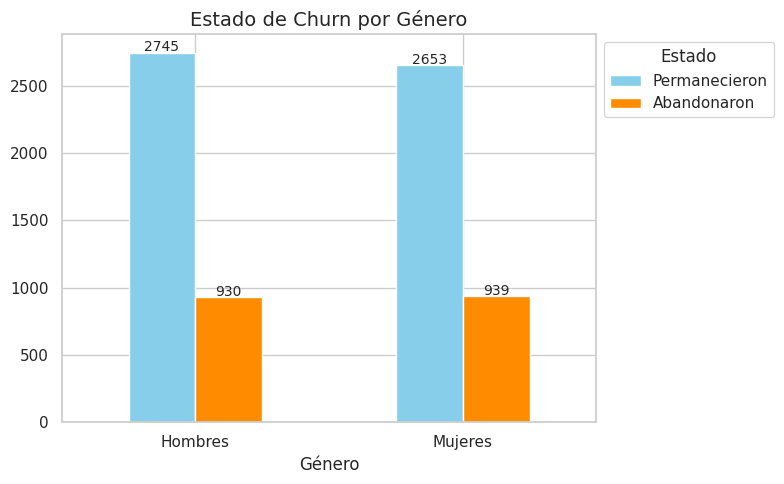

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Estilo
sns.set(style="whitegrid")

# Crear DataFrame
data = pd.DataFrame({
    'Hombres': hombres,
    'Mujeres': mujeres
}).T

data.columns = ['Permanecieron', 'Abandonaron']

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(8, 5))

# Dibujar el gráfico de barras
bar_plot = data.plot(kind='bar', ax=ax, color=['skyblue', 'darkorange'])

# Etiquetas y título
ax.set_title('Estado de Churn por Género', fontsize=14)
ax.set_xlabel('Género', fontsize=12)
ax.set_xticklabels(data.index, rotation=0)

# Añadir los valores encima de cada barra
for container in bar_plot.containers:
    for bar in container:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 10,
            f'{int(height)}',
            ha='center',
            fontsize=10
        )


ax.legend(title='Estado', labels=['Permanecieron', 'Abandonaron'], loc='upper left', bbox_to_anchor=(1.0, 1))

plt.tight_layout()
plt.show()

In [55]:
grupo_senior = df_final_kev.groupby('SeniorCitizen')['Churn'].value_counts()

no_senior = grupo_senior[0]
senior = grupo_senior[1]

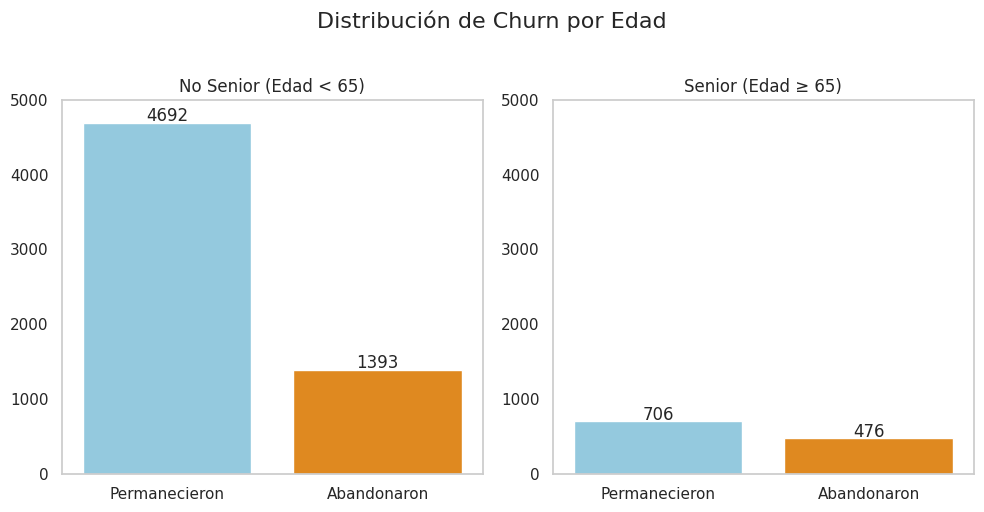

In [56]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
plt.suptitle('Distribución de Churn por Edad', fontsize=16, y=1.02)

def plot_churn(data, ax, title):
    sns.barplot(
        x=data.index,
        y=data.values,
        hue=data.index,
        palette=["skyblue", "darkorange"],
        legend=False,
        ax=ax
    )
    ax.grid(False)
    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_xticks([0,1])
    ax.set_xticklabels(['Permanecieron', 'Abandonaron'])
    ax.set_ylim(0, 5000)
    for i, count in enumerate(data.values):
        ax.text(i, count+20, str(count), ha='center')

plot_churn(no_senior, axs[0], 'No Senior (Edad < 65)')
plot_churn(senior, axs[1], 'Senior (Edad ≥ 65)')

plt.tight_layout()
plt.show()

In [57]:
df_final_kev['Contract'].unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [58]:
# Agrupar por tipo de contrato y contar valores de churn
contratos = df_final_kev.groupby('Contract')['Churn'].value_counts()

anio    = contratos['One year']
mes     = contratos['Month-to-month']
anios2  = contratos['Two year']

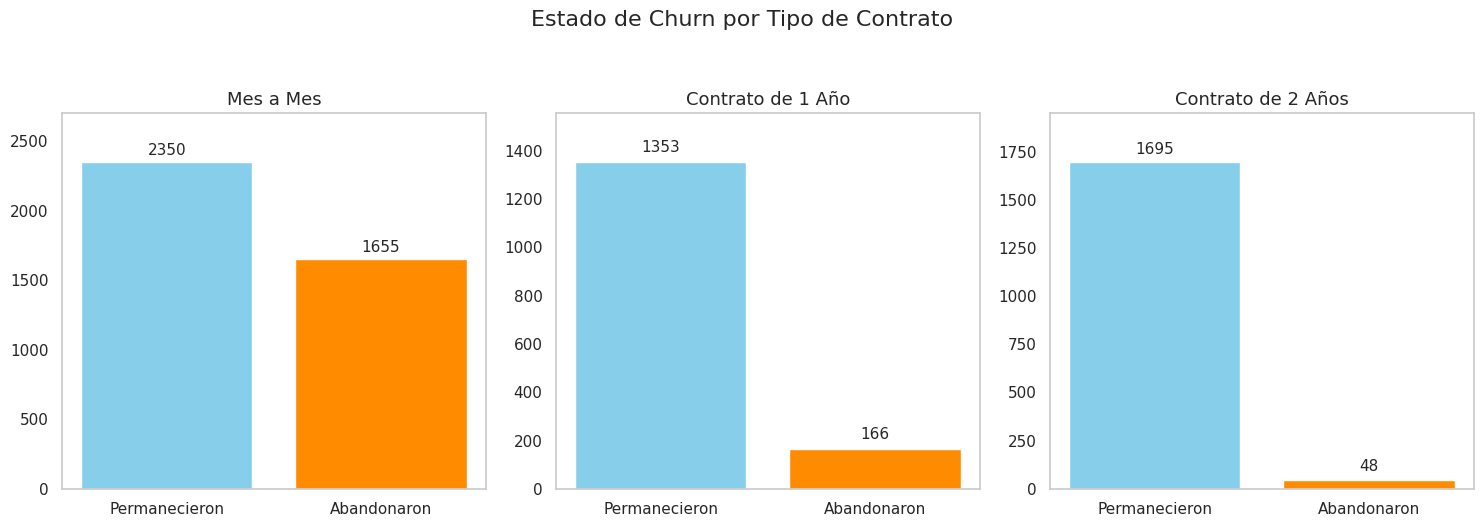

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
plt.suptitle('Estado de Churn por Tipo de Contrato', fontsize=16, y=1.05)

# Función para graficar cada subgráfico
def plot_churn(data, ax, title):
    colors = ['skyblue', 'darkorange']
    bars = ax.bar(
        ['Permanecieron', 'Abandonaron'],
        data.values,
        color=colors
    )
    ax.grid(False)
    ax.set_title(title, fontsize=13)
    ax.set_ylim(0, max(data.values)*1.15)

    for bar, count in zip(bars, data.values):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 30,
                str(count), ha='center', va='bottom', fontsize=11)

# Usamos la función en cada tipo de contrato
plot_churn(mes, axs[0], 'Mes a Mes')
plot_churn(anio, axs[1], 'Contrato de 1 Año')
plot_churn(anios2, axs[2], 'Contrato de 2 Años')

plt.tight_layout()
plt.show()

In [60]:
df_final_kev['PaymentMethod'].unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [61]:
check = df_final_kev[df_final_kev['PaymentMethod'] == 'Mailed check']['Churn'].value_counts()
Electronic  = df_final_kev[df_final_kev['PaymentMethod'] == 'Electronic check']['Churn'].value_counts()
Credit = df_final_kev[df_final_kev['PaymentMethod'] == 'Credit card (automatic)']['Churn'].value_counts()
Bank = df_final_kev[df_final_kev['PaymentMethod'] == 'Bank transfer (automatic)']['Churn'].value_counts()

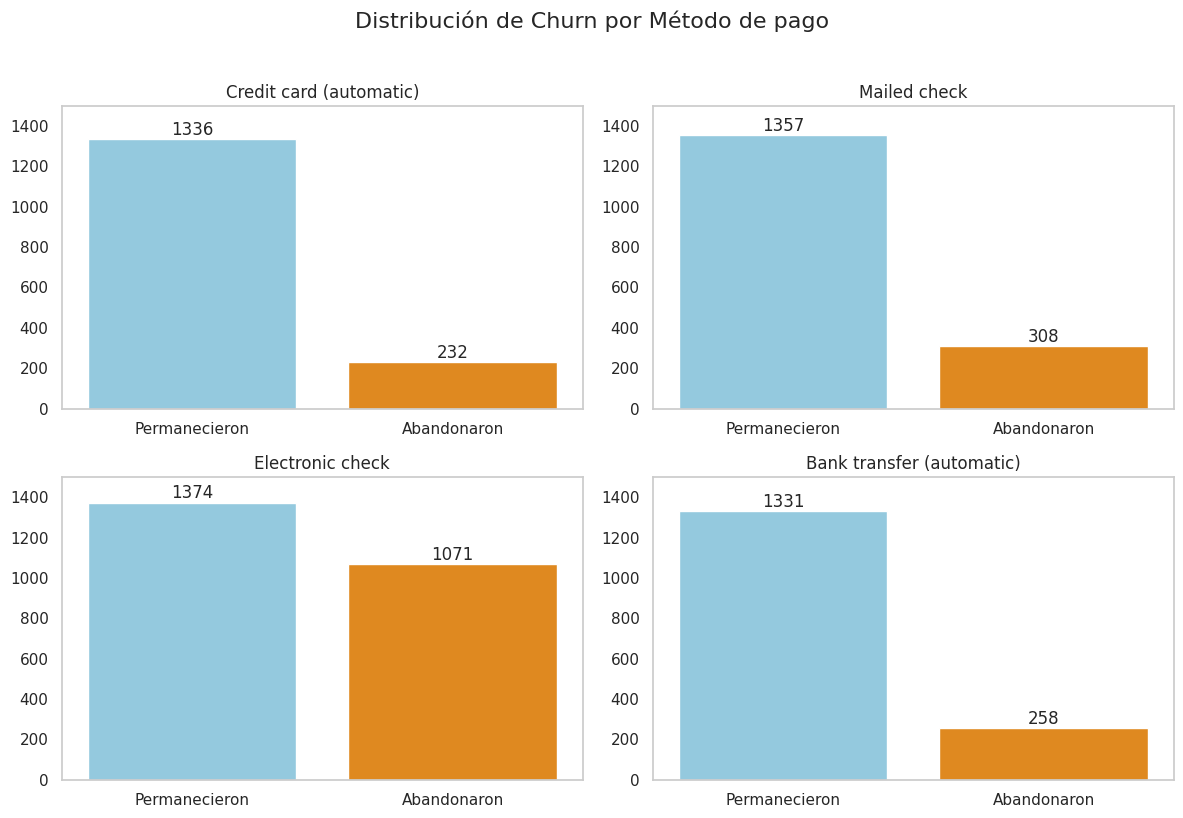

In [62]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
plt.suptitle('Distribución de Churn por Método de pago', fontsize=16, y=1.02)

def plot_churn(data, ax, title):
    sns.barplot(
        x=data.index,
        y=data.values,
        hue=data.index,
        palette=["skyblue", "darkorange"],
        legend=False,
        ax=ax
    )
    ax.grid(False)
    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_xticks([0,1])
    ax.set_xticklabels(['Permanecieron', 'Abandonaron'])
    ax.set_ylim(0, 1500)
    for i, count in enumerate(data.values):
        ax.text(i, count+20, str(count), ha='center')

plot_churn(check, axs[0][1], 'Mailed check')
plot_churn(Electronic, axs[1][0], 'Electronic check')
plot_churn(Credit, axs[0][0], 'Credit card (automatic)')
plot_churn(Bank, axs[1][1], 'Bank transfer (automatic)')


plt.tight_layout()
plt.show()

--- Total Gastado ---
Abandonaron (Churn = 1):
 count    1869.000000
mean     1531.796094
std      1890.822994
min        18.850000
25%       134.500000
50%       703.550000
75%      2331.300000
max      8684.800000
Name: Charges.Total, dtype: float64

Permanecieron (Churn = 0):
 count    5398.000000
mean     2535.263977
std      2330.802193
min         0.000000
25%       564.362500
50%      1663.625000
75%      4237.275000
max      8672.450000
Name: Charges.Total, dtype: float64

--- Tiempo de Contrato ---
Abandonaron (Churn = 1):
 count    1869.000000
mean       17.979133
std        19.531123
min         1.000000
25%         2.000000
50%        10.000000
75%        29.000000
max        72.000000
Name: tenure, dtype: float64

Permanecieron (Churn = 0):
 count    5398.000000
mean       37.321045
std        24.178367
min         0.000000
25%        14.000000
50%        37.000000
75%        61.000000
max        72.000000
Name: tenure, dtype: float64


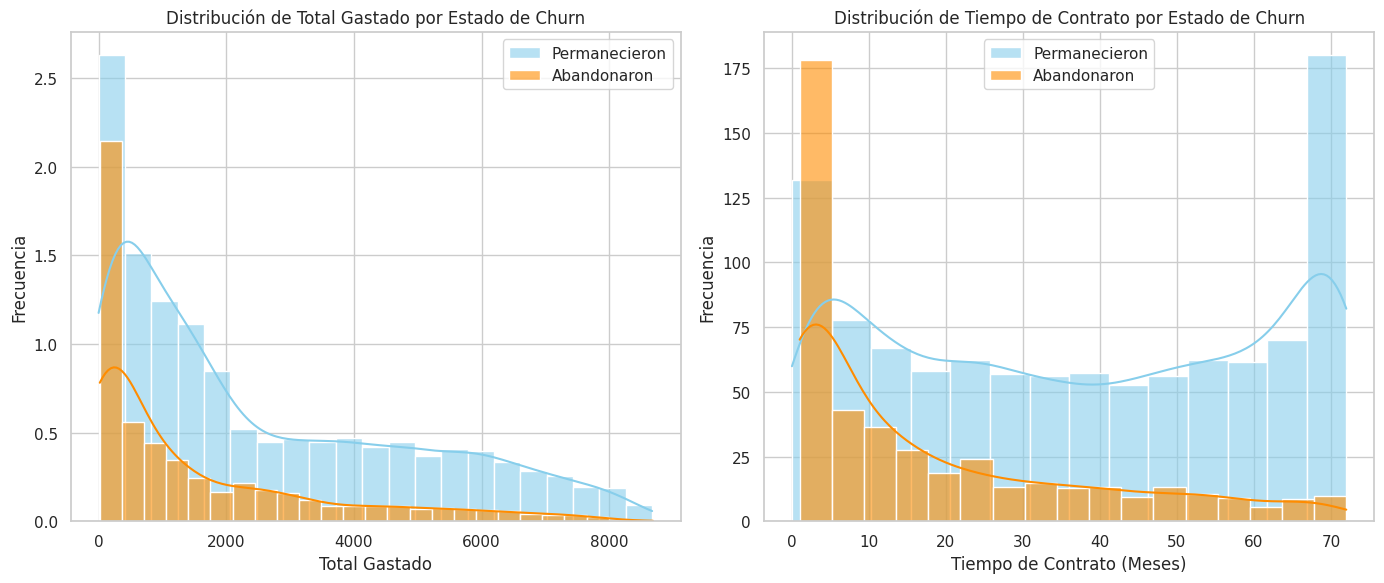

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo general
sns.set(style="whitegrid")

# Datos
TotalGastado1 = df_final_kev[df_final_kev['Churn'] == 1]['Charges.Total']
TotalGastado0 = df_final_kev[df_final_kev['Churn'] == 0]['Charges.Total']
tiempoDeContrato1 = df_final_kev[df_final_kev['Churn'] == 1]['tenure']
tiempoDeContrato0 = df_final_kev[df_final_kev['Churn'] == 0]['tenure']

# Estadísticas descriptivas
print("--- Total Gastado ---")
print("Abandonaron (Churn = 1):\n", TotalGastado1.describe())
print("\nPermanecieron (Churn = 0):\n", TotalGastado0.describe())

print("\n--- Tiempo de Contrato ---")
print("Abandonaron (Churn = 1):\n", tiempoDeContrato1.describe())
print("\nPermanecieron (Churn = 0):\n", tiempoDeContrato0.describe())

# Gráficos
plt.figure(figsize=(14, 6))

# Total Gastado
plt.subplot(1, 2, 1)
sns.histplot(TotalGastado0, color='skyblue', label='Permanecieron', kde=True, stat='frequency', alpha=0.6)
sns.histplot(TotalGastado1, color='darkorange', label='Abandonaron', kde=True, stat='frequency', alpha=0.6)
plt.title('Distribución de Total Gastado por Estado de Churn')
plt.xlabel('Total Gastado')
plt.ylabel('Frecuencia')
plt.legend()

# Tiempo de Contrato
plt.subplot(1, 2, 2)
sns.histplot(tiempoDeContrato0, color='skyblue', label='Permanecieron', kde=True, stat='frequency', alpha=0.6)
sns.histplot(tiempoDeContrato1, color='darkorange', label='Abandonaron', kde=True, stat='frequency', alpha=0.6)
plt.title('Distribución de Tiempo de Contrato por Estado de Churn')
plt.xlabel('Tiempo de Contrato (Meses)')
plt.ylabel('Frecuencia')
plt.legend()

plt.tight_layout()
plt.show()

<ipython-input-64-1100921072>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Charges.Total', data=df_final_kev, palette=custom_palette)
<ipython-input-64-1100921072>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=df_final_kev, palette=custom_palette)


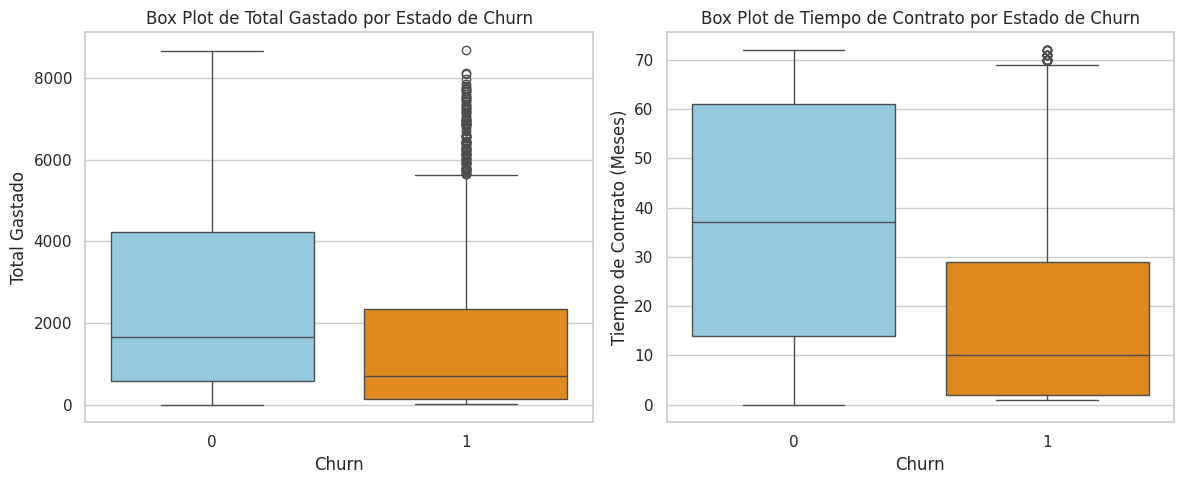

In [64]:
custom_palette = {'0': 'skyblue', '1': 'darkorange'}

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Churn', y='Charges.Total', data=df_final_kev, palette=custom_palette)
plt.title('Box Plot de Total Gastado por Estado de Churn')
plt.xlabel('Churn')
plt.ylabel('Total Gastado')

plt.subplot(1, 2, 2)
sns.boxplot(x='Churn', y='tenure', data=df_final_kev, palette=custom_palette)
plt.title('Box Plot de Tiempo de Contrato por Estado de Churn')
plt.xlabel('Churn')
plt.ylabel('Tiempo de Contrato (Meses)')

plt.tight_layout()
plt.show()

## Ejercicio Extra

In [65]:
# Seleccionar solo columnas numéricas
num_df = df_final_kev.select_dtypes(include=['int64', 'float64'])

# Calcular correlación
corr_matrix = num_df.corr()

print(corr_matrix['Churn'].sort_values(ascending=False))

Churn               1.000000
Charges.Monthly     0.189866
Cuentas_Diarias     0.189825
PaperlessBilling    0.186666
SeniorCitizen       0.146733
StreamingTV         0.062430
StreamingMovies     0.060586
MultipleLines       0.039343
PhoneService        0.012571
DeviceProtection   -0.063452
OnlineBackup       -0.080163
Partner            -0.148546
TechSupport        -0.160440
Dependents         -0.161384
OnlineSecurity     -0.166828
Charges.Total      -0.193345
tenure             -0.344079
Name: Churn, dtype: float64


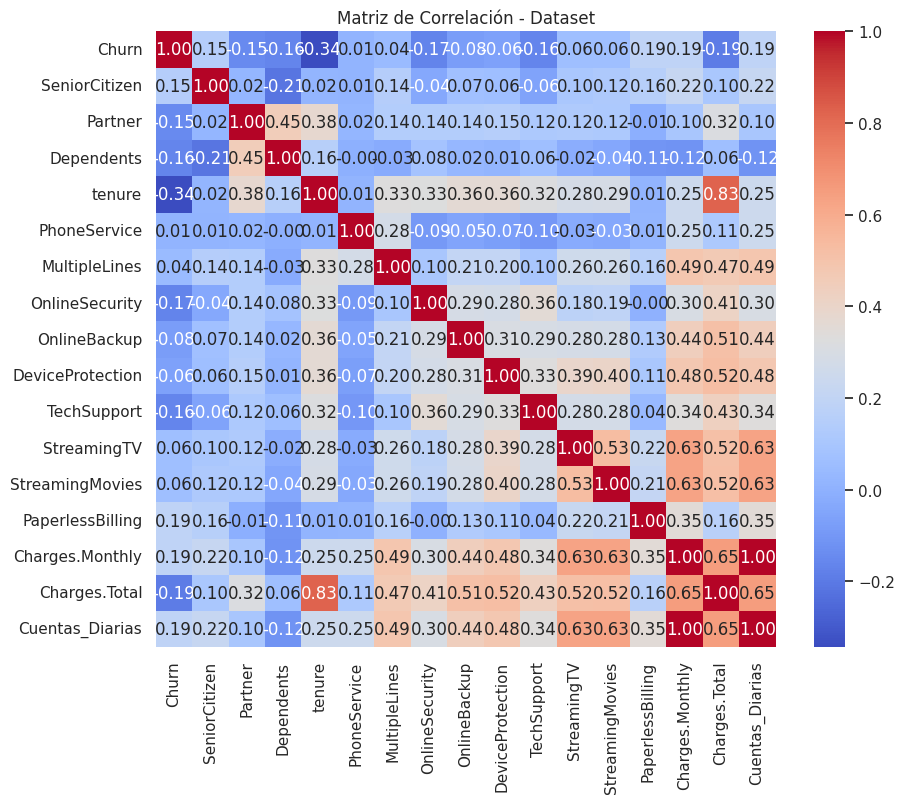

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación - Dataset')
plt.show()

In [67]:
print(df_final_kev.columns.tolist())

['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']


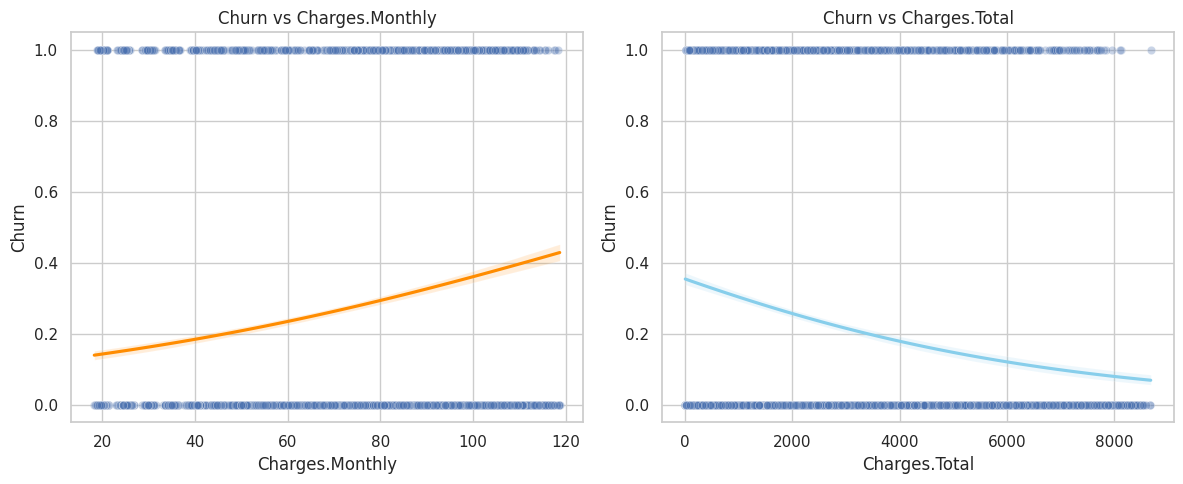

In [68]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Charges.Monthly', y='Churn', data=df_final_kev, alpha=0.3)
sns.regplot(x='Charges.Monthly', y='Churn', data=df_final_kev, logistic=True, scatter=False, color='darkorange')
plt.title('Churn vs Charges.Monthly')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Charges.Total', y='Churn', data=df_final_kev, alpha=0.3)
sns.regplot(x='Charges.Total', y='Churn', data=df_final_kev, logistic=True, scatter=False, color='skyblue')
plt.title('Churn vs Charges.Total')

plt.tight_layout()
plt.show()

#📄Informe final

#### Informe del análisis de Churn de Clientes - Challege Telecom X

# **Introducción**



El objetivo principal de este análisis era comprender a detalle el fenómeno de la "evasión de clientes" que se esta presentando. La empresa Telecom X enfrenta actualmente una alta tasa de cancelaciones de servicios, lo que impacta directamente en sus ingresos y crecimiento. Además de que preocupa considerablemente al propietario.

Para abordar este desafío, es crucial identificar los motivos principales que impulsan a los clientes a dejar la compañía y de que menera generar una solución a esto.

En este informe nos encargamos de;

*Detectar señales tempranas de riesgo de fuga.

*Proponer intervenciones para reducir el churn.

*Mejorar la retención y rentabilidad.

# **Limpieza y Tratamiento de Datos**



El análisis y limpieza de los datos fue un paso vital dentro del proceso, apoyando en la compresión e interpretación de lo datos.

Se realizaron pasos para asegurar la calidad de los datos:

- Carga de datos en df_final_kev desde un CSV o DataFrame existente en el notebook, para graficar.

- Inspección inicial con df.head(), df.info() y df.describe() para identificar tipos, nulos y valores erróneos de los datos iniciales. Esto se realizo separado por categoría.

- Gestión de valores faltantes:

Columnas numéricas (como TotalCharges) completas o imputadas con funciones estadisticas, que nos permitieron tener un panorama claro de la información y estadisticamente sacar conclusiones.

Limpieza de filas faltantes en variables clave de los datos.

- Conversión de tipos:

Ajustes en el Churn de strings ('Yes'/'No') a enteros (1/0) para facilitar el análisis cuantitativo de los valores.

Columnas de servicios binarias codificadas de sí/no a 1/0, de igual manera para facilitar la interpretación de los valores.

Creación de columna derivada num_servicios como suma de servicios contratados para cada cliente (valor entre 0 y 9).


# **Análisis Exploratorio de Datos (EDA)**

Realizando el análisis exploratorio de los datos, nos facilita la identificación de patrones y tendencias significativas, opteniendo una comprensión profunda de los factores asociados al churn. Se realizaron visualizaciones y estadísticas descriptivas para explorar patrones relevantes.



#### *Factores categoricos y su relación con el Churn*

<u>**Permanencia:**</u> Se identifica que un 74,3% de los clientes permanecen en el tiempo con la empresa. Un porcentaje alto, pero aun bajo en relación a la tasa de abandono que se identifica con un 25,7% un número alto para este tipo de empresas.

<u>**Genero:**</u> La distribución por genero se encuentra muy igual, la diferencia entre hombres y mujeres es tan solo de 83 cabezas. Adicional se logra identificar que existe una tasa de abandono un poco mas alta para las mujeres, realmente la difernecia no es tanta, pero si son las que mas abandonan.

<u>**Tipo de edad:**</u> En este aparado se identifivo que el segmento "No Senior" tiene un mayor riesgo de abandono, a pesar de que representa una mayor cantidad de clientes que permanecen en el tiempo. Sería de gran importancia identificar las principales razones de abandono (facilidades, edad, fallecimiento). Para el segmentp "Senior", existe un número considerable de clientes (706) que permanecieron, mientras que 476 abandonaron. Para este segmento la comparación es muy igual, se identifica que es un segmento que tiene claro el porque se mantienen y escogen esta empresa.

<u>**Contrato:**</u> Los clientes con contratos por mes son más inestables, en comparación a contratos por año o cada dos años, estos son mas leales y consistentes en el tiempo. Importante recalcar que los contratos por mes son mucho mas populares, albergando una mayor cantidad de clientes.

<u>**Método de pago:**</u> El cheque electrónico viene siendo el método de pago con mayor abandonos, manteniendo un 57% sobre el total de abandones generales. Siendo una preocupante cifra de 1071 abandonos. Este es un punto de atención clave para estrategias de retención y mejora. Se identifica que los pagos realizados por tarjeta de crédito (crédito bancario) se asocian con el menor riesgo de abandono, sugiriendo una mayor estabilidad en estos clientes.

Para un mejor entendimiento de la distribución de estas variables entre los grupos de churn y no churn, se utilizaron valores estadísticos y visualizaciones (histogramas y box plots) para detallar lo que se deseaba transmitir.

--- Total Gastado ---

Abandonaron (Churn = 1):

 count    1869.000000

mean     1531.796094

std      1890.822994

min        18.850000

25%       134.500000

50%       703.550000

75%      2331.300000

max      8684.800000

Name: Charges.Total, dtype: float64

Permanecieron (Churn = 0):

 count    5398.000000

mean     2535.263977

std      2330.802193

min         0.000000

25%       564.362500

50%      1663.625000

75%      4237.275000

max      8672.450000

Name: Charges.Total, dtype: float64

--- Tiempo de Contrato ---
Abandonaron (Churn = 1):

 count    1869.000000

mean       17.979133

std        19.531123

min         1.000000

25%         2.000000

50%        10.000000

75%        29.000000

max        72.000000

Name: tenure, dtype: float64

Permanecieron (Churn = 0):

 count    5398.000000

mean       37.321045

std        24.178367

min         0.000000

25%        14.000000

50%        37.000000

75%        61.000000

max        72.000000

Name: tenure, dtype: float64

Se aplicaron dos gráficos comparativos que muestran cómo se distribuyen Charges.Total y tenure entre quienes permanecieron (skyblue) y quienes abandonaron (darkorange).

Observación: Clientes que churneaban tienden a tener gasto total más bajo y tenure más cortos.

**Visualización (Histograma):**

El histograma nos muestra una concentración de clientes con cancelaciones en rangos de menor gasto, y con una curva que alcanza su pico en valores muy bajos. Los clientes que no cancelan mantienen una distribución más estable y manteniendo picos hacia valores de gasto mucho más altos.
En el histograma para el tiempo de contrato los clientes que permanecen tienen una distribución más uniforme, con aumento en la frecuencia hacia los contratos más largos.

**Visualización (Box Plot):**

**Gráfico 1: Box Plot de Total Gastado (Charges.Total) por Estado de Churn**

*Clientes que no abandonaron (Churn = 0):*

- Presentan una mediana de gasto más alta.

- Muestran que hay clientes con rangos de gastos muy altos.

- Se observa mayor número de outliers, lo que podría reflejar clientes de largo plazo o con más servicios.

*Clientes que abandonaron (Churn = 1 / darkorange):*

- Mantienen una mediana de gasto mucho mas baja, cuentan con totales de gastos mas concentrados en valores bajos, esto refleja que dichos clientes o no consumieron mucho o no fueron clientes que duraron mucho.

**Gráfico 2: Box Plot de Tiempo de Contrato (tenure) por Estado de Churn**

*Clientes que no abandonaron (Churn = 0 / skyblue):*

- Estos mantienen una mediana de tiempo de contrato mas alta, reflejando que se han mantenido mas tiempo. Existe una amplia dispersión, dando a entender que hay tanto clientes nuevos como ya existentes.

*Clientes que abandonaron (Churn = 1 / darkorange):*

- Este gráfico nos identifica que dichos clientes posiblemente abandonaron el servicio temprano. La distribución esta concentrada en valores bajos reflejando ciclos cortos de vida, y sin outliers, basicamente indicando que abandonan rapido.


Los gráficos reflejan una relación negativa entre Churn, el tiempo de permanencia y el gasto total generado por los clientes.

Aquellos clientes que tienen mayor gasto y mayor tiempo en la empresa tienen menos probabilidades de abandonar, tal vez por un tema de seguridad de poca estabilidad en el manejo de los gastos.

Estos datos permiten guiar estrategias para retener a nuevos clientes o clientes de bajo consumo y también encontrar estrategías que permitan apoyar a clientes con mayor consumo para que no tiendan al abandono.

# **Ejercicio Extra**

**Gráfico** 1: Representa una matriz de correlación, permite visualizar la relación lineal entre variables numéricas del dataset. Cada celda de la matriz indica el coeficiente de correlación de Pearson, el cual varía entre:

+1.00: correlación positiva perfecta

0.00: sin correlación

−1.00: correlación negativa perfecta

Se tiene dos colores, un azul oscuro que visualiza la correlaciones negativas y un rojo oscuro que representa correlaciones positivas con intensidad.

Existen pares con valores cercanos a 1.00 o −1.00, indica una alta redundancia o fuerte relación lineal, útil para reducir dimensiones o identificar variables clave.


- Comprender cómo se relacionan las variables entre sí.

- Focalizar los esfuerzos en variables que realmente influyen en la evasión de clientes.

- Reducir ruido eliminando o transformando variables muy correlacionadas entre sí.

**Gráfico 2:

El gráfico tiene dos diagramas de dispersión, uno para cada variable relacionada con el gasto del cliente:

Charges.Monthly vs Churn

Charges.Total vs Churn

Identifican la probabilidad de abandono del cliente tomando como base los valores de gasto.

*Subgráfico 1: Charges.Monthly vs Churn*

- Existe una relación positiva entre el cargo mensual y la probabilidad de abandono.

- Los clientes que pagan más mensualmente tienen mayor riesgo de churn.

- La dispersión muestra que aunque hay clientes con cargos altos que no abandonan, la probabilidad de churn aumenta progresivamente con el cargo mensual.

*Subgráfico 2: Charges.Total vs Churn*

- Existe una relación negativa entre el gasto total acumulado y el churn.

- Los clientes que han gastado más tienden a permanecer más tiempo.

- Esto sugiere que los clientes con mayor antigüedad y compromiso financiero son menos propensos a abandonar.

# **Conclusiones e Insights**

Dados los analisis de datos realizados, se ha identifico una serie de valores importantes y adicional un perfil de cliente claro y propenso al abandono.

- Gasto total y tenure son indicadores fuertes de retención: Clientes con mayor antigüedad y gasto total tienden a permanecer.

- Número de servicios contratados también está relacionado: Quienes usan múltiples servicios tienen menos riesgo de churn.

- Método de pago: Aunque no lo analizamos en detalle aquí, análisis anteriores mostraron diferencias: Clientes con métodos automáticos tienden a churnar menos.

- Gastos mensuales: Existe una tendencia de que menor MonthlyCharges se asocia a mayor probabilidad de churn.

Tenemos una categoría de clientes con alto riesgo son aquellos clientes con mayor riesgo de abandono suelen ser los que adquieren contratos mensuales, que utilizan método de pago el cheque electronico, son no seniors, y, crucialmente, aquellos que han tenido un tiempo de contrato más corto y un gasto total acumulado más bajo.
Los primeros meses es de gran importancia para valorar la permanecencia de los clientes, un gran porcentaje de los clientes que cancelan lo hacen en el primer año de contrato. Bajo esta misma línea una buena extrategía sería contar como ancla contratos a larzo plazo, esperando reducir una probabilidad de abandono.

Con esto el equipo de Data Science pueda avanzar en la creación de modelos predictivos de abandono y, ayudar a la empresa, en el desarrollo de estrategias de retención más dirigidas a este grupo de cliente y mucho mas estrategicas.


En son de resumen general, se identifica que los clientes nuevos o de bajo gasto total, pero con cargos mensuales elevados, son el grupo de mayor riesgo de abandono.

Los clientes antiguos o de alto gasto total, aún con cargos mensuales moderados, muestran fidelidad y menor probabilidad de churn.

# **Recomendaciones Estratégicas**

En base a los análisis mencionados, se recomienda las siguientes pautas a la empresa Telecom X, con el fin de reducir la evasión de clientes.

- Programas de fidelización para clientes nuevos o de bajo gasto (primeros 6 meses), ofreciendo descuentos para aumentar tenure. Además de incentivar a contratos a largo plazo, con el fin de poder ligar a los clientes mucho mas tiempo a la empresa.

- Bundles de servicios: Incentivar la contratación de más servicios (package deals) para reducir churn, relacioando a los clientes a mayor escala.

- Promociones en pagos automáticos: Ofrecer incentivos (como descuentos) por migrar a pago automático si se detecta churn por métodos manuales.

- Monitoreo activo de clientes con bajo gasto mensual o tenure corto, permitiendo accionar en momentos de alertas, desarrollando un programa de fidelización basado en el gasto acumulado.

- Modelado predictivo: Implementar un modelo basado en las variables analizadas (charges, tenure, num_servicios) para predecir churn y actuar preventivamente.

- Revisión de precios mensuales: Podrían generar una estrategía de precios, principalmente para nuevos usuarios.

# **Cierre**

Realizar este análisis ha permitido:

- Identificar perfiles con mayor riesgo de churn.

- Entender qué variables tienen más impacto.

- Proponer acciones concretas para mejorar retención.

Todo esto se debe aplicar a clientes con mayor impacto sin dejar de lado aquellos clientes mas estables, considerando buenas prácticas y nuevas posibles que puedan incorporar.

